## Convolution neural network (CNN)

โหลดชุดข้อมูลภาพ Cifar-10 โดยใช้ keras

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from keras.utils.np_utils import to_categorical     # convert label to binary vector

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


แสดงมิติชุดข้อมูลภาพด้วย ชุดข้อมูลฝึกฝน (train data) และ ชุดข้อมูลทดสอบ (test data)

In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


แสดงภาพข้อมูลจากชุดข้อมูลฝุกฝน (train data) ด้วย matplotlib

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


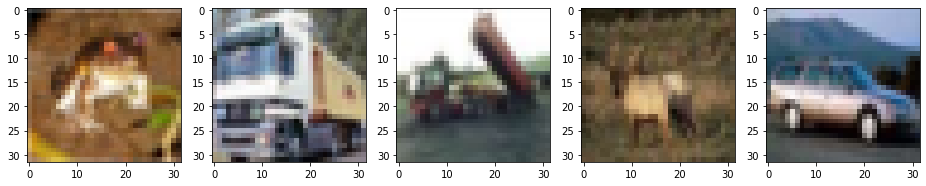

In [ ]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

เข้ารหัสลาเบล (label) ให้อยู่ในรูป binary code vector สำหรับเอาท์ุพุตของโมเดล cnn

นอมัลไลน์ข้อมูลภาพ  

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

สร้างโมเดล CNN เพื่อจำแนกภาพ

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01)

cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                11530     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

ฝึกฝนโมเดล cnn ที่ถูกสร้างด้านบนบนชุดข้อมูลฝึกฝน (train data) และ plot กราฟแสดงค่า loss

แสดงค่า loss และ accuracy ของโมเดลที่ถูกฝึกฝนแล้ว บนชุดข้อมูล test

In [ ]:
score = cnn.evaluate(X_test, y_test, verbose=0)
# y= cnn.predict(img)
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[1.1491912603378296, 0.6001999974250793]


# Exercise

## Build Convolution Neural Network for cat&dog image data

In [ ]:
!git clone https://github.com/vyomshm/Cats-Dogs-with-keras.git

Cloning into 'Cats-Dogs-with-keras'...
remote: Enumerating objects: 2893, done.
remote: Counting objects: 100% (2893/2893), done.
remote: Compressing objects: 100% (2892/2892), done.
remote: Total 2893 (delta 0), reused 2893 (delta 0), pack-reused 0
Receiving objects: 100% (2893/2893), 62.53 MiB | 18.98 MiB/s, done.


In [ ]:
import cv2
img = cv2.imread('Cats-Dogs-with-keras/data/train/cats/cat.2.jpg')
print(img.shape)

(396, 312, 3)


In [ ]:
import cv2
import os                                         ## package for file path system
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical            ## encode numbers to one-hot encode form
from sklearn.preprocessing import LabelEncoder    ## encode string labels to numbers

folders = ['Cats-Dogs-with-keras/data/train/cats',      #define paths for image files
           'Cats-Dogs-with-keras/data/train/dogs'
          ]

images = []                                                   # input image list
labels = []                                                   # image label list

def load_images_from_folder(folder):             # function to read image files from a given folder
    for filename in os.listdir(folder):          # for each image file in the folder
        img = cv2.imread(os.path.join(folder, filename))  # read an image file
        img = cv2.resize(img, (32, 32))
        #img =image.img_to_array(img)          # convert image data to keras array
        images.append(img)                         # append the image data
        label = folder.split(os.path.sep)[-1]      # get a label for the image
        labels.append(label)                       # append the label

def convert_images(images):
    X = np.array(images)
    # X = X.reshape(X.shape[0],100*100*3)            ## reshape 3D to 1D vector
    return X

def convert_labels(labels):
    enc = LabelEncoder()
    P = enc.fit_transform(labels)                ## convert string labels to numbers
    Y = to_categorical(P)                        ## convert number to one-hot-encode form
    return Y

for folder in folders:
    print('Reading images from path: ' + folder)
    load_images_from_folder(folder)
X = np.array(images)/255.0
Y = convert_labels(labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape)
print(Y_train.shape)

Reading images from path: Cats-Dogs-with-keras/data/train/cats
Reading images from path: Cats-Dogs-with-keras/data/train/dogs
(1638, 32, 32, 3)
(1638, 2)


## ออกแบบ CNN for Cat & Dog classification

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD

cnn = Sequential()

### ฝึกฝนโมเดล CNN ด้วยชุดข้อมูลฝึกฝน และ plot กราฟแสดง loss

วัดผลการฝึกฝนโมเดล cnn บนชุดข้อมูลทดสอบ (test data) โดยแสดงค่า loss และ accuracy

In [ ]:
score = cnn.evaluate(X_test,Y_test)
print(score)

13/13 [==============================] - 0s 10ms/step - loss: 1.0405 - accuracy: 0.5415
[1.040503740310669, 0.5414634346961975]


โหลดรูปภาพสุนัขหรือแมวจากภายนอก จากนั้นสั่งให้ CNN ทำการทำนายลาเบล

[[0. 1.]]
label :  dog


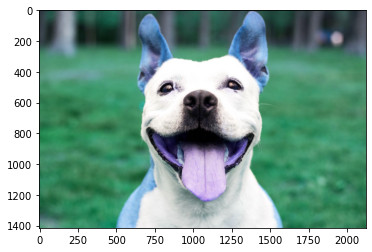

In [ ]:
labels = ['cat', 'dog']
new_img = cv2.imread('test1.jpg')
plt.imshow(new_img)

new_img = cv2.resize(new_img, (32, 32))

new_img = new_img.reshape(1, 32, 32, 3)

predicted_label = cnn.predict(new_img)
print(predicted_label)
print('label : ', labels[np.argmax(predicted_label[0])])

สร้างโมเดล CNN LeNet-5 โดยมีโครงสร้างตามด้านล่าง จากนั้นทดลองฝึกฝนโมเดลเพื่อจำแนก dog & cat

![](https://miro.medium.com/max/4000/1*DMcPgeekUftwk0GTMcNawg.png)

## Keras Applications

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'test1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02110806', 'basenji', 0.6543896), ('n02091244', 'Ibizan_hound', 0.1471521), ('n02093428', 'American_Staffordshire_terrier', 0.09510354)]


# Transfer learning
Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. It is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.
![](https://www.researchgate.net/publication/328680040/figure/fig1/AS:688421848752129@1541143967564/Schematic-representation-of-convolutional-neural-network-CNN-architecture-and-the.png)


ศึกษาการทำ transfer learning ใน keras จากลิงค์ด้านล่าง
https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

จากนั้นทดลองประยุกต์ใช้ pretrained VGG16 สำหรับการจำแนก dog & cat และ cifar10
![](https://storage.googleapis.com/lds-media/images/vgg16-architecture.width-1200.jpg)

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',  # Load weights pre-trained on ImageNet.
                   input_shape=(32, 32, 3),
                    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(2, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
sgd = SGD(learning_rate=0.03)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
52/52 [==============================] - 2s 24ms/step - loss: 0.7752 - accuracy: 0.5324
Epoch 2/15
52/52 [==============================] - 1s 18ms/step - loss: 0.6874 - accuracy: 0.6093
Epoch 3/15
52/52 [==============================] - 1s 18ms/step - loss: 0.6816 - accuracy: 0.6215
Epoch 4/15
52/52 [==============================] - 1s 18ms/step - loss: 0.6845 - accuracy: 0.6074
Epoch 5/15
52/52 [==============================] - 1s 19ms/step - loss: 0.6514 - accuracy: 0.6416
Epoch 6/15
52/52 [==============================] - 1s 18ms/step - loss: 0.6229 - accuracy: 0.6587
Epoch 7/15
52/52 [==============================] - 1s 18ms/step - loss: 0.6568 - accuracy: 0.6477
Epoch 8/15
52/52 [==============================] - 1s 18ms/step - loss: 0.5978 - accuracy: 0.6752
Epoch 9/15
52/52 [==============================] - 1s 19ms/step - loss: 0.5919 - accuracy: 0.6844
Epoch 10/15
52/52 [==============================] - 1s 18ms/step - loss: 0.6084 - accuracy: 0.6728
Epoch 11/

## Homework

### โหลดชุดภาพ hand gesture image dataset จากลิงค์ด้านล่าง
### https://github.com/ardamavi/Sign-Language-Digits-Dataset/tree/master/Dataset



In [ ]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (660/660), done.


Reading images from path: Sign-Language-Digits-Dataset/Dataset/0
Reading images from path: Sign-Language-Digits-Dataset/Dataset/1
Reading images from path: Sign-Language-Digits-Dataset/Dataset/2
Reading images from path: Sign-Language-Digits-Dataset/Dataset/3
Reading images from path: Sign-Language-Digits-Dataset/Dataset/4
Reading images from path: Sign-Language-Digits-Dataset/Dataset/5
Reading images from path: Sign-Language-Digits-Dataset/Dataset/6
Reading images from path: Sign-Language-Digits-Dataset/Dataset/7
Reading images from path: Sign-Language-Digits-Dataset/Dataset/8
Reading images from path: Sign-Language-Digits-Dataset/Dataset/9
training data :  (1649, 32, 32, 3)
test data :  (413, 32, 32, 3)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 30, 30, 32)        896       
________________________________________________________________

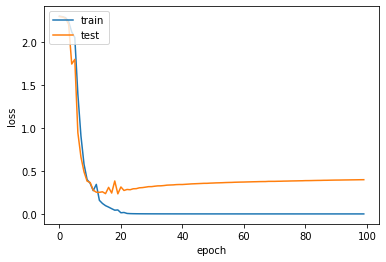

In [ ]:
import cv2
import os                                                      ## package for file path system
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical            ## encode numbers to one-hot encode form
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder                 ## encode string labels to numbers

path_img = 'Sign-Language-Digits-Dataset/Dataset/'

images = []                                                   # input image list
labels = []                                                   # image label list

def load_images_from_folder(folder):             # function to read image files from a given folder
    for filename in os.listdir(folder):          # for each image file in the folder
        img = cv2.imread(os.path.join(folder, filename))  # read an image file
        img = cv2.resize(img, (32, 32))
        images.append(img)                         # append the image data
        label = folder.split(os.path.sep)[-1]      # get a label for the image
        labels.append(label)                       # append the label

def convert_labels(labels):
    enc = LabelEncoder()
    P = enc.fit_transform(labels)                ## convert string labels to numbers
    Y = to_categorical(P)                        ## convert number to one-hot-encode form
    return Y

for i in range(10):
    folder = path_img + str(i)
    print('Reading images from path: ' + folder)
    load_images_from_folder(folder)

X = np.array(images)/255.0
Y = convert_labels(labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print('training data : ' , X_train.shape)
print('test data : ', X_test.shape)

###############################################################################################
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

ops = SGD(learning_rate=0.1)
cnn.compile(loss='categorical_crossentropy', optimizer=ops)
print(cnn.summary())

history = cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100, batch_size=64)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ทำ transfer learning จากโมเดล ResNet50 และ VGG19 พร้อมแสดงกราฟเปรียบเทียบ loss ระหว่าง 2 โมเดล

In [ ]:
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow import keras

inputs = keras.Input(shape=(32, 32, 3))             ### specify input shape for pretrained CNNs

######################################   load pretrained VGG19 ##################################################
base_VGG19 = VGG19(weights='imagenet',  # Load weights pre-trained on ImageNet.
                   input_shape=(32, 32, 3),
                    include_top=False)  # Do not include the ImageNet classifier at the top.
base_VGG19.trainable = False             ## freeze pretrained VGG layers

x = base_VGG19(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(100, activation = 'relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model_VGG = keras.Model(inputs, outputs)
model_VGG.compile(loss='categorical_crossentropy', optimizer="sgd")

######################################   load pretrained VGG19 ##################################################

base_ResNet50 = ResNet50(weights='imagenet',  # Load weights pre-trained on ImageNet.
                   input_shape=(32, 32, 3),
                    include_top=False)  # Do not include the ImageNet classifier at the top.
base_ResNet50.trainable = False
x = base_ResNet50(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(100, activation = 'relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model_ResNet = keras.Model(inputs, outputs)
model_ResNet.compile(loss='categorical_crossentropy', optimizer="sgd")

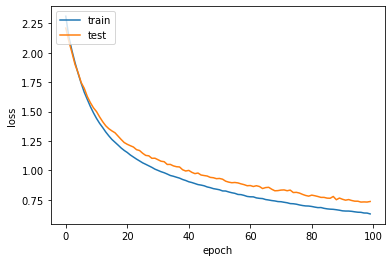

In [ ]:
history = model_VGG.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100, batch_size=64, verbose = 0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

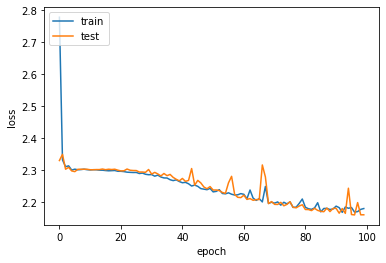

In [ ]:
history = model_ResNet.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100, batch_size=64, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
################################## evaluate each model on test data #################################

result_cnn  = cnn.evaluate(X_test, Y_test)
result_VGG  = model_VGG.evaluate(X_test, Y_test)
result_ResNet  = model_ResNet.evaluate(X_test, Y_test)

print('CNN\'s Loss ', result_cnn)
print('VGG19\'s Loss ', result_VGG)
print('ResNet50\'s Loss ', result_ResNet)

13/13 [==============================] - 0s 30ms/step - loss: 2.1604
CNN's Loss  0.43284574151039124
VGG19's Loss  0.7360312938690186
ResNet50's Loss  2.1603641510009766
